# HR Analytics#

Within this dataset, the question we are trying to answer is why do employees leave their company early? 

A couple of things to note is that this dataset is simulated as noted on Kaggle, and I also looked up how other people have answered this question to get some inspiration when I got stuck.

In [60]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [66]:
df.index.names = ['Employee Number']

In [67]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
Employee Number,,,,,,,,,,
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low


Listing out all of the columns to see what this dataset has to offer.

In [4]:
df.columns 

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Since "sales" and "salary" is an object, let us see what it holds

In [6]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['left'].unique()

array([1, 0])

Let us also see if there is anything missing in this dataset

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Let us check out sales and salary in more detail

In [10]:
df.groupby('sales').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [11]:
df.groupby('salary').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,788.55,871.25,4660,247236,4568,192,82,72
low,4395.11,5245.70,27800,1470491,25154,1040,2172,66
medium,4008.23,4623.86,24582,1297827,22748,937,1317,181


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Below, I find that "satisfaction level" and "left" has the greatest correlation based on the question we are trying to answer

In [13]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Created a heat map to better show the correlation between "satisifaction_level", and "left"

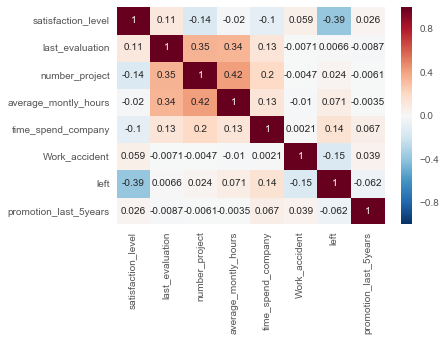

In [14]:
sns.heatmap(df.corr(), vmax=1, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e224a50>]], dtype=object)

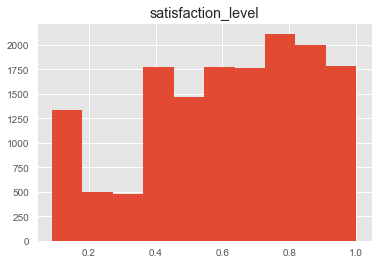

In [15]:
df.hist('satisfaction_level')

In [32]:
ct = pd.crosstab (df.satisfaction_level, df.left)

In [17]:
ct2 = pd.crosstab ([df.satisfaction_level, df.left], df.number_project)

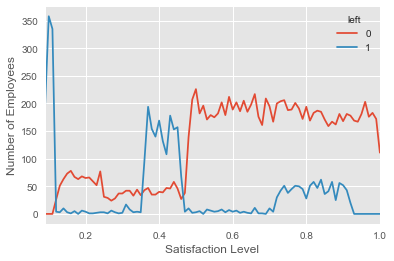

In [34]:
ax = ct.plot()
ax.set_ylabel("Number of Employees")
ax.set_xlabel("Satisfaction Level")

In [ ]:
df.loc[w.female != 'row', 'column'] = 0
df.loc[w.female == 'female', 'female'] = 1

In [69]:
c = df.salary

In [71]:
c.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [44]:
cs = pd.get_dummies(c, prefix = None)

In [50]:
cs.sum()

0    11428
1     3571
dtype: int64

In [62]:
X = df[ ['satisfaction_level']]

In [51]:
left = df.left

In [58]:
left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [68]:
model_left = linear_model.LogisticRegression().\
    fit(X, cs.left)

print model_left.coef_
print model_left.intercept_

AttributeError: 'DataFrame' object has no attribute 'left'